In [2]:
# Importing Libraries
import pandas as pd  

# Importing the Dataset
dataset = pd.read_csv("/content/iris.csv") # upload the dataset 
print(dataset.head()) 

# Preprocessing
X = dataset.iloc[:, 1:5]  
y = dataset.iloc[:, 5]

# Train Test Split 
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

# Feature Scaling
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

# Training
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors = 5)  
classifier.fit(X_train, y_train)  

# Predictions
y_pred = classifier.predict(X_test) 

# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

import pickle
# Model persistence
output_model_file = 'Knnmodel.pkl'

# Save the model
with open(output_model_file, 'wb') as f:
    pickle.dump(classifier, f)


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
[[11  0  0]
 [ 0  9  0]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



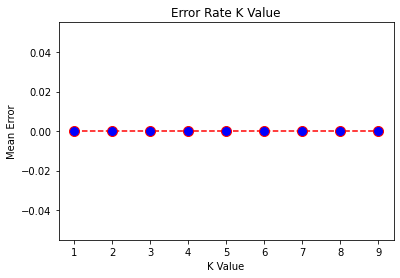

In [3]:
import numpy as np  

# Comparing Error Rate with the K Value
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 10):  
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
#     print(pred_i != y_test)
#     print(np.mean(pred_i != y_test))
    error.append(np.mean(pred_i != y_test))

import matplotlib.pyplot as plt     
plt.plot(range(1, 10), error, 
         color='red', linestyle='dashed', 
         marker='o', markerfacecolor='blue', 
         markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 
plt.show()


# ***SAVING MODEL OFFLINE***

In [4]:
import pickle 
#model persistence
output_model_file='Knnmodel.pkl'
#save the model
with open(output_model_file,'wb') as f:
  pickle.dump(classifier,f)


# VALUE OF K ?

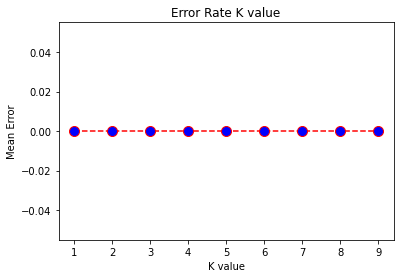

In [5]:
import numpy as np
#Comparing Error Rate with the k Value
error= []
# Calculaing error for K values bertween 1 and 10
for i in range(1, 10):
  knn= KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  # print(pred_i !=y_test)
  # print (np.mean (pred_i !=y_test))
  error.append(np.mean(pred_i != y_test))

import matplotlib.pyplot as plt
plt.plot (range(1 , 10), error,
          color='red', linestyle='dashed',
          marker= 'o', markerfacecolor='blue',
          markersize= 10)  
plt.title('Error Rate K value')
plt.xlabel('K value')
plt.ylabel('Mean Error')
plt.show()


# CLASSIFIACATION PREDICTUION

In [10]:
import pickle
# model persistence 
output_model_file = 'Knnmodel.pkl'
#load the model

with open(output_model_file, 'rb' ) as f:
  knn = pickle.load(f)

#new Features Set

X = np.array([[ 2.8 ,3.0, 1.2, 4.3],[0.7, 3.2, 0.7, 1.4] ])
print(X)

# Features pre-processing by standardization

from sklearn.preprocessing import StandardScaler
sacler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

#Making Predictoion
predictions = knn.predict(X)
print(predictions)

[[2.8 3.  1.2 4.3]
 [0.7 3.2 0.7 1.4]]
['Iris-virginica' 'Iris-setosa']
